In [87]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [88]:
vis = 'raw'

In [89]:
if vis == 'raw'
    file = "train_ZoGVYWq.csv"
    # file = "train_imputed_encoded.csv"
    data = pd.read_csv(file)

    data.set_index('id', inplace=True)
    data['renewal'] = data['renewal'].astype('bool')
    data['sourcing_channel'] = data['sourcing_channel'].astype('category') 
    data['residence_area_type'] = data['residence_area_type'].astype('category')
    new_names = {'perc_premium_paid_by_cash_credit': 'cash_credit',
                'Count_3-6_months_late': 'late3',
                'Count_6-12_months_late': 'late6',
                'Count_more_than_12_months_late': 'late12',
                 'application_underwriting_score': 'score',
                'residence_area_type': 'residence',
                'no_of_premiums_paid': 'prems_paid',
                'sourcing_channel': 'channel'}
    data.rename(index=str, columns=new_names, inplace=True)

else:
    file = "train_imputed_encoded.csv"
    data = pd.read_csv(file)

    data.set_index('id', inplace=True)
    data['renewal'] = data['renewal'].astype('bool')
    
        

SyntaxError: invalid syntax (<ipython-input-89-5574f81acfb3>, line 1)

In [90]:
data.describe(include='all')

,cash_credit,age_in_days,Income,late3,late6,late12,score,prems_paid,premium,renewal,channel_A,channel_B,channel_C,channel_D,channel_E,residence_Rural,residence_Urban
count,63882.000000,63882.000000,6.388200e+04,63882.000000,63882.000000,63882.000000,63882.000000,63882.000000,63882.000000,63882,63882.000000,63882.000000,63882.000000,63882.000000,63882.000000,63882.000000,63882.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.313499,18841.981497,2.087612e+05,0.245357,0.077804,0.059184,99.068446,10.851946,10916.464732,NaN,0.542156,0.206020,0.150481,0.094048,0.007295,0.394509,0.605491
std,0.334326,5204.162907,5.254491e+05,0.685053,0.433123,0.309787,0.726524,5.155890,9383.793773,NaN,0.498224,0.404449,0.357545,0.291898,0.085098,0.488749,0.488749
min,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.960000,2.000000,1200.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.034000,14974.000000,1.080225e+05,0.000000,0.000000,0.000000,98.840000,7.000000,5400.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.166000,18625.000000,1.662800e+05,0.000000,0.000000,0.000000,99.190000,10.000000,7500.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.536000,22636.000000,2.515900e+05,0.000000,0.000000,0.000000,99.520000,14.000000,13800.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000


In [91]:
sum(data['renewal'])/len(data['renewal'])

0.9379167840706302

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63882 entries, 56158 to 99690
Data columns (total 17 columns):
cash_credit        63882 non-null float64
age_in_days        63882 non-null int64
Income             63882 non-null int64
late3              63882 non-null float64
late6              63882 non-null float64
late12             63882 non-null float64
score              63882 non-null float64
prems_paid         63882 non-null int64
premium            63882 non-null int64
renewal            63882 non-null bool
channel_A          63882 non-null int64
channel_B          63882 non-null int64
channel_C          63882 non-null int64
channel_D          63882 non-null int64
channel_E          63882 non-null int64
residence_Rural    63882 non-null int64
residence_Urban    63882 non-null int64
dtypes: bool(1), float64(5), int64(11)
memory usage: 10.8 MB


In [93]:
data.dropna(inplace=True)

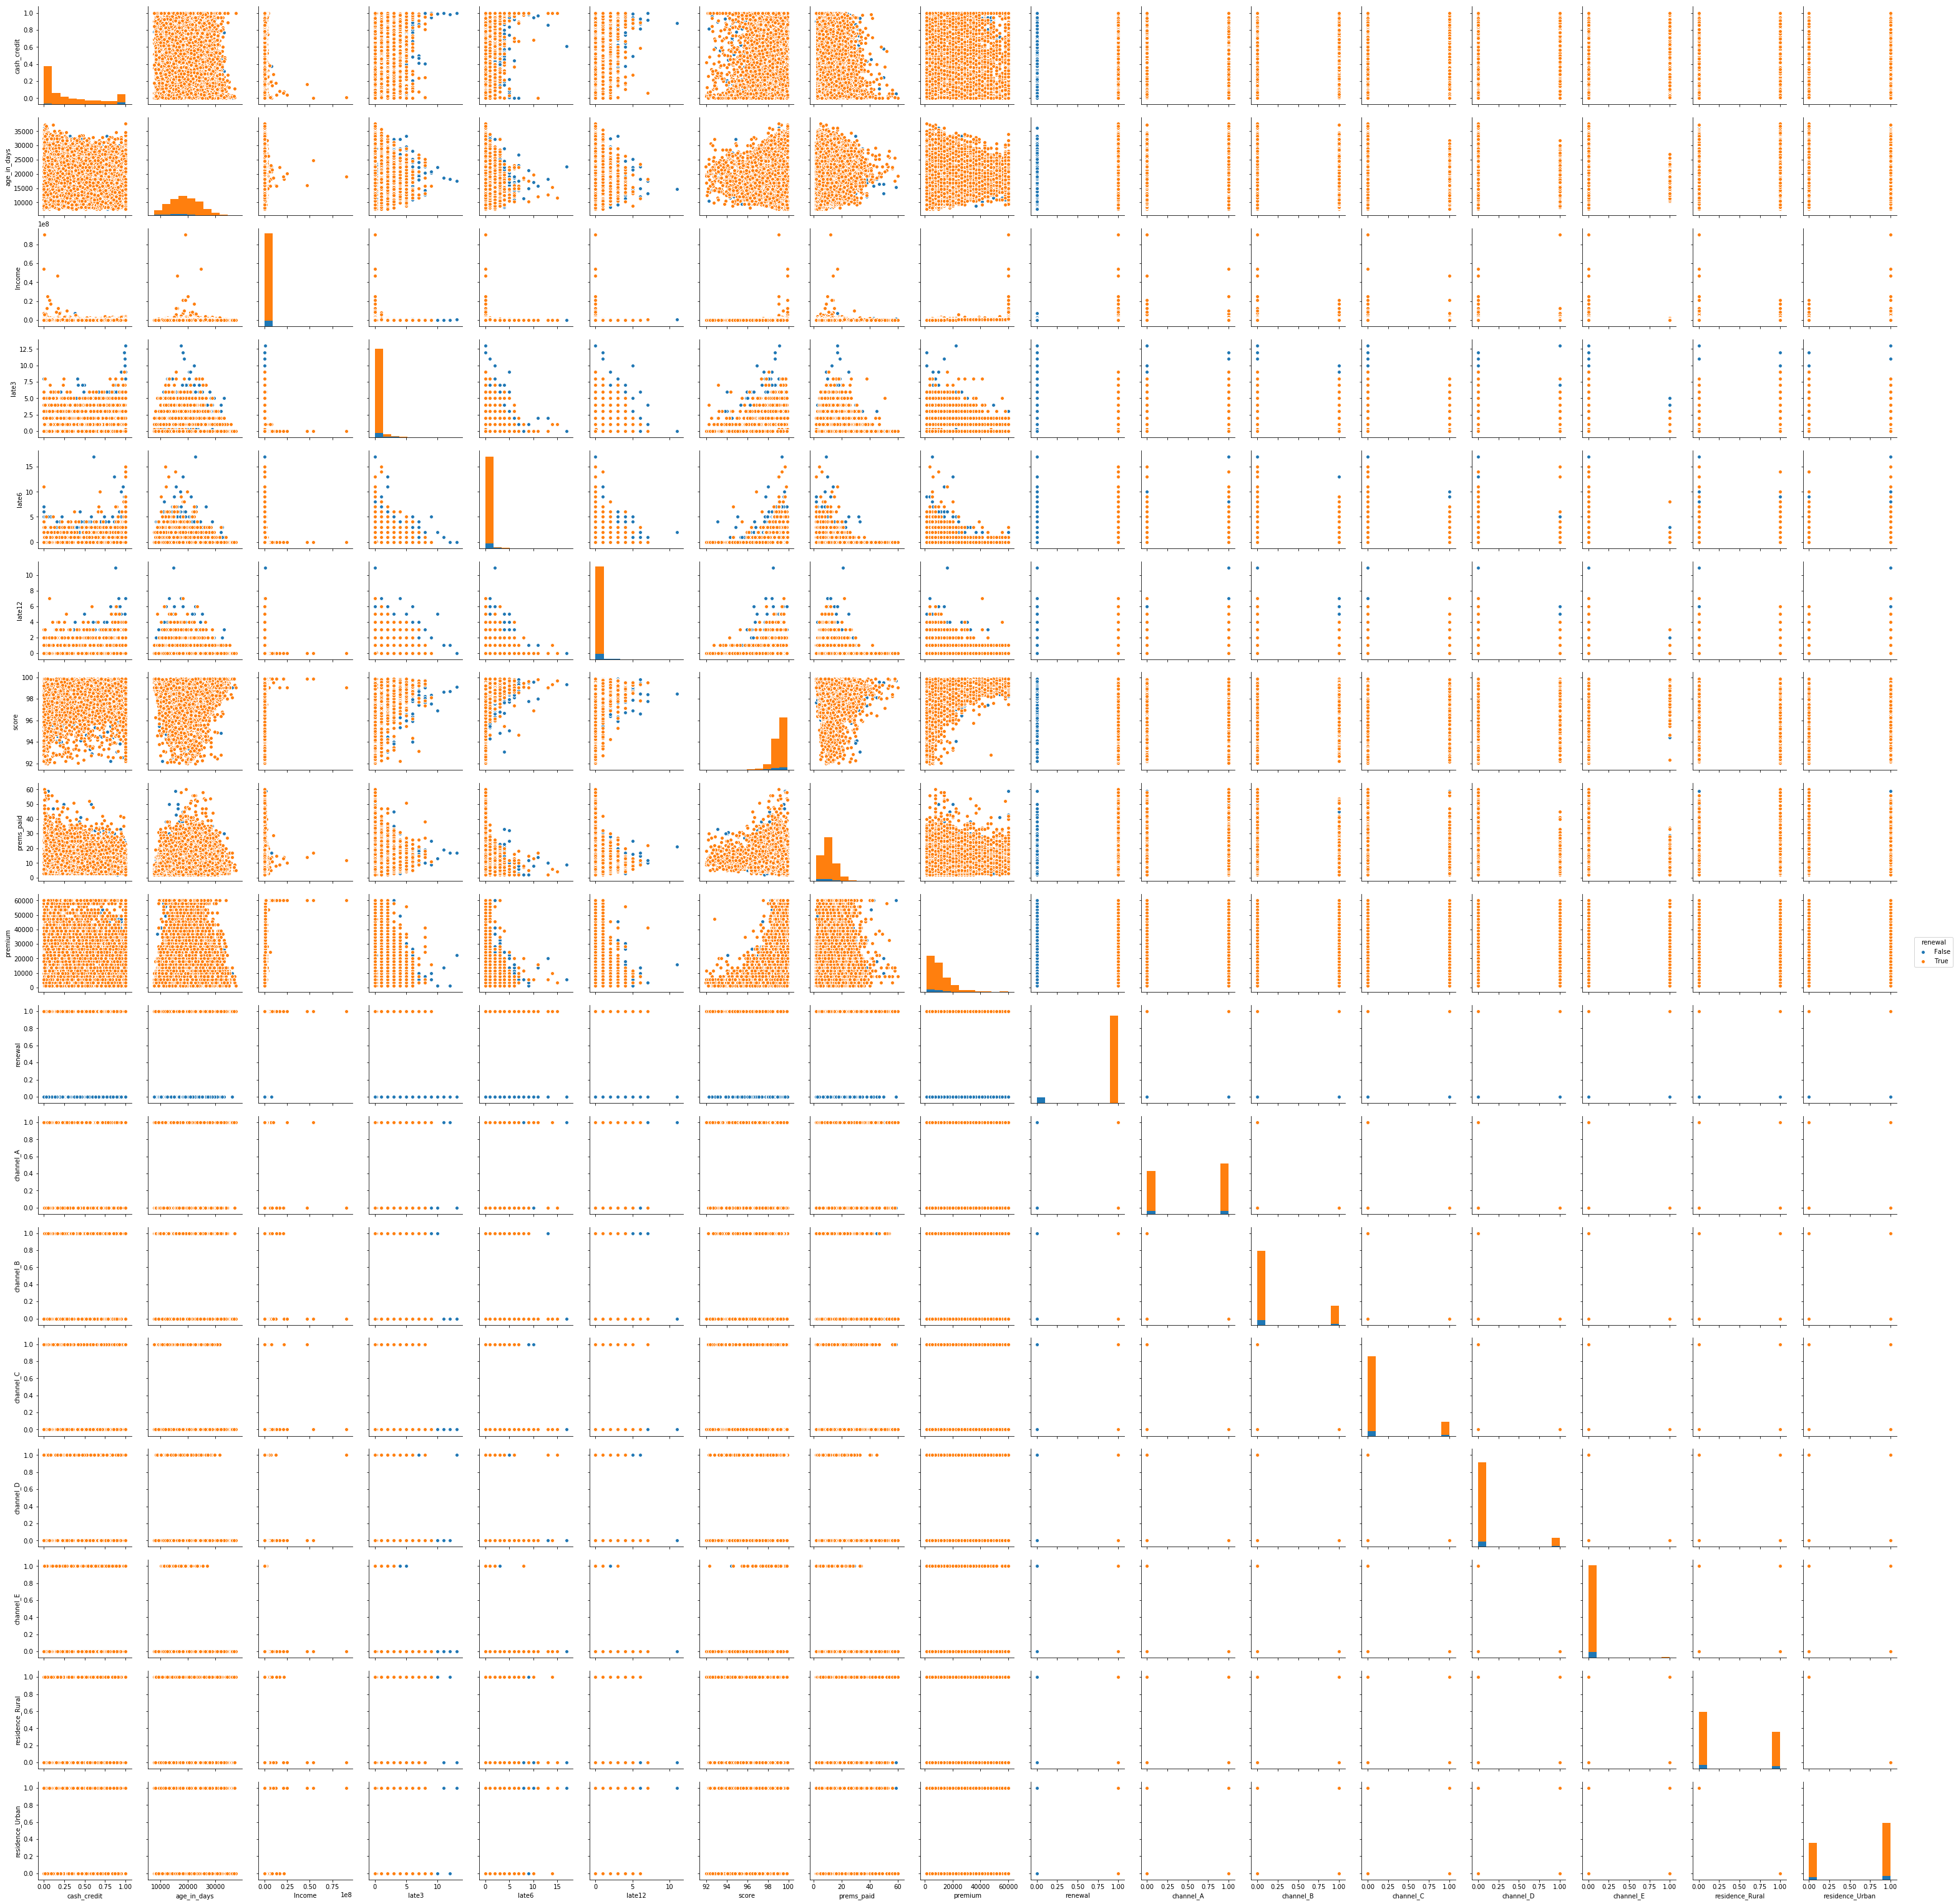

In [94]:
g = sns.pairplot(data, hue="renewal", dropna=True)

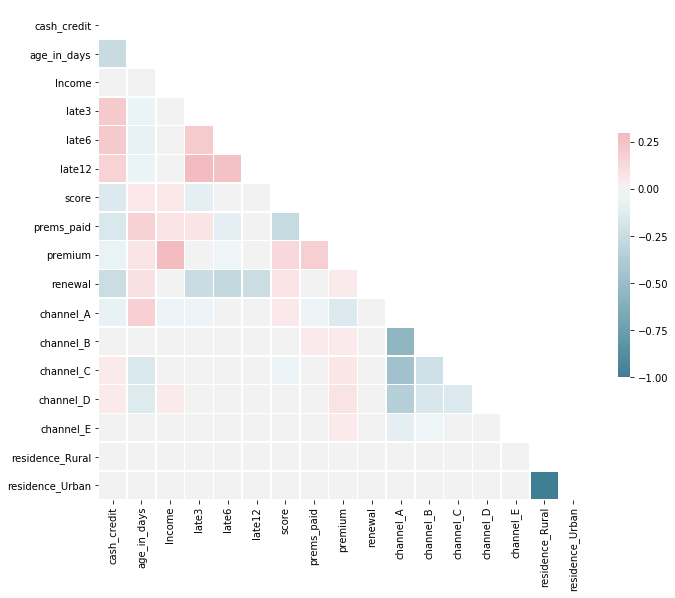

In [95]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Now: visual inspec of test data

In [96]:
data_test = pd.read_csv("test_66516Ee.csv")
data_test.set_index('id', inplace=True)
data_test['sourcing_channel'] = data_test['sourcing_channel'].astype('category') 
data_test['residence_area_type'] = data_test['residence_area_type'].astype('category')


In [97]:
data_test.describe(include='all')

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium
count,34224.000000,34224.000000,3.422400e+04,34193.000000,34193.000000,34193.000000,32901.000000,34224.000000,34224,34224,34224.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,Urban,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18672,20608,NaN
mean,0.314457,18824.215346,2.028201e+05,0.238733,0.080718,0.058111,99.061898,10.890428,NaN,NaN,10834.721248
std,0.334059,5246.525604,2.702536e+05,0.686162,0.454634,0.307046,0.742942,5.216867,NaN,NaN,9263.074506
min,0.000000,7671.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,NaN,NaN,1200.000000
25%,0.034000,14972.000000,1.063975e+05,0.000000,0.000000,0.000000,98.800000,7.000000,NaN,NaN,5400.000000
50%,0.169000,18623.000000,1.650700e+05,0.000000,0.000000,0.000000,99.210000,10.000000,NaN,NaN,7500.000000
75%,0.540000,22636.000000,2.500200e+05,0.000000,0.000000,0.000000,99.530000,14.000000,NaN,NaN,13800.000000


In [98]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34224 entries, 649 to 93826
Data columns (total 11 columns):
perc_premium_paid_by_cash_credit    34224 non-null float64
age_in_days                         34224 non-null int64
Income                              34224 non-null int64
Count_3-6_months_late               34193 non-null float64
Count_6-12_months_late              34193 non-null float64
Count_more_than_12_months_late      34193 non-null float64
application_underwriting_score      32901 non-null float64
no_of_premiums_paid                 34224 non-null int64
sourcing_channel                    34224 non-null category
residence_area_type                 34224 non-null category
premium                             34224 non-null int64
dtypes: category(2), float64(5), int64(4)
memory usage: 2.7 MB


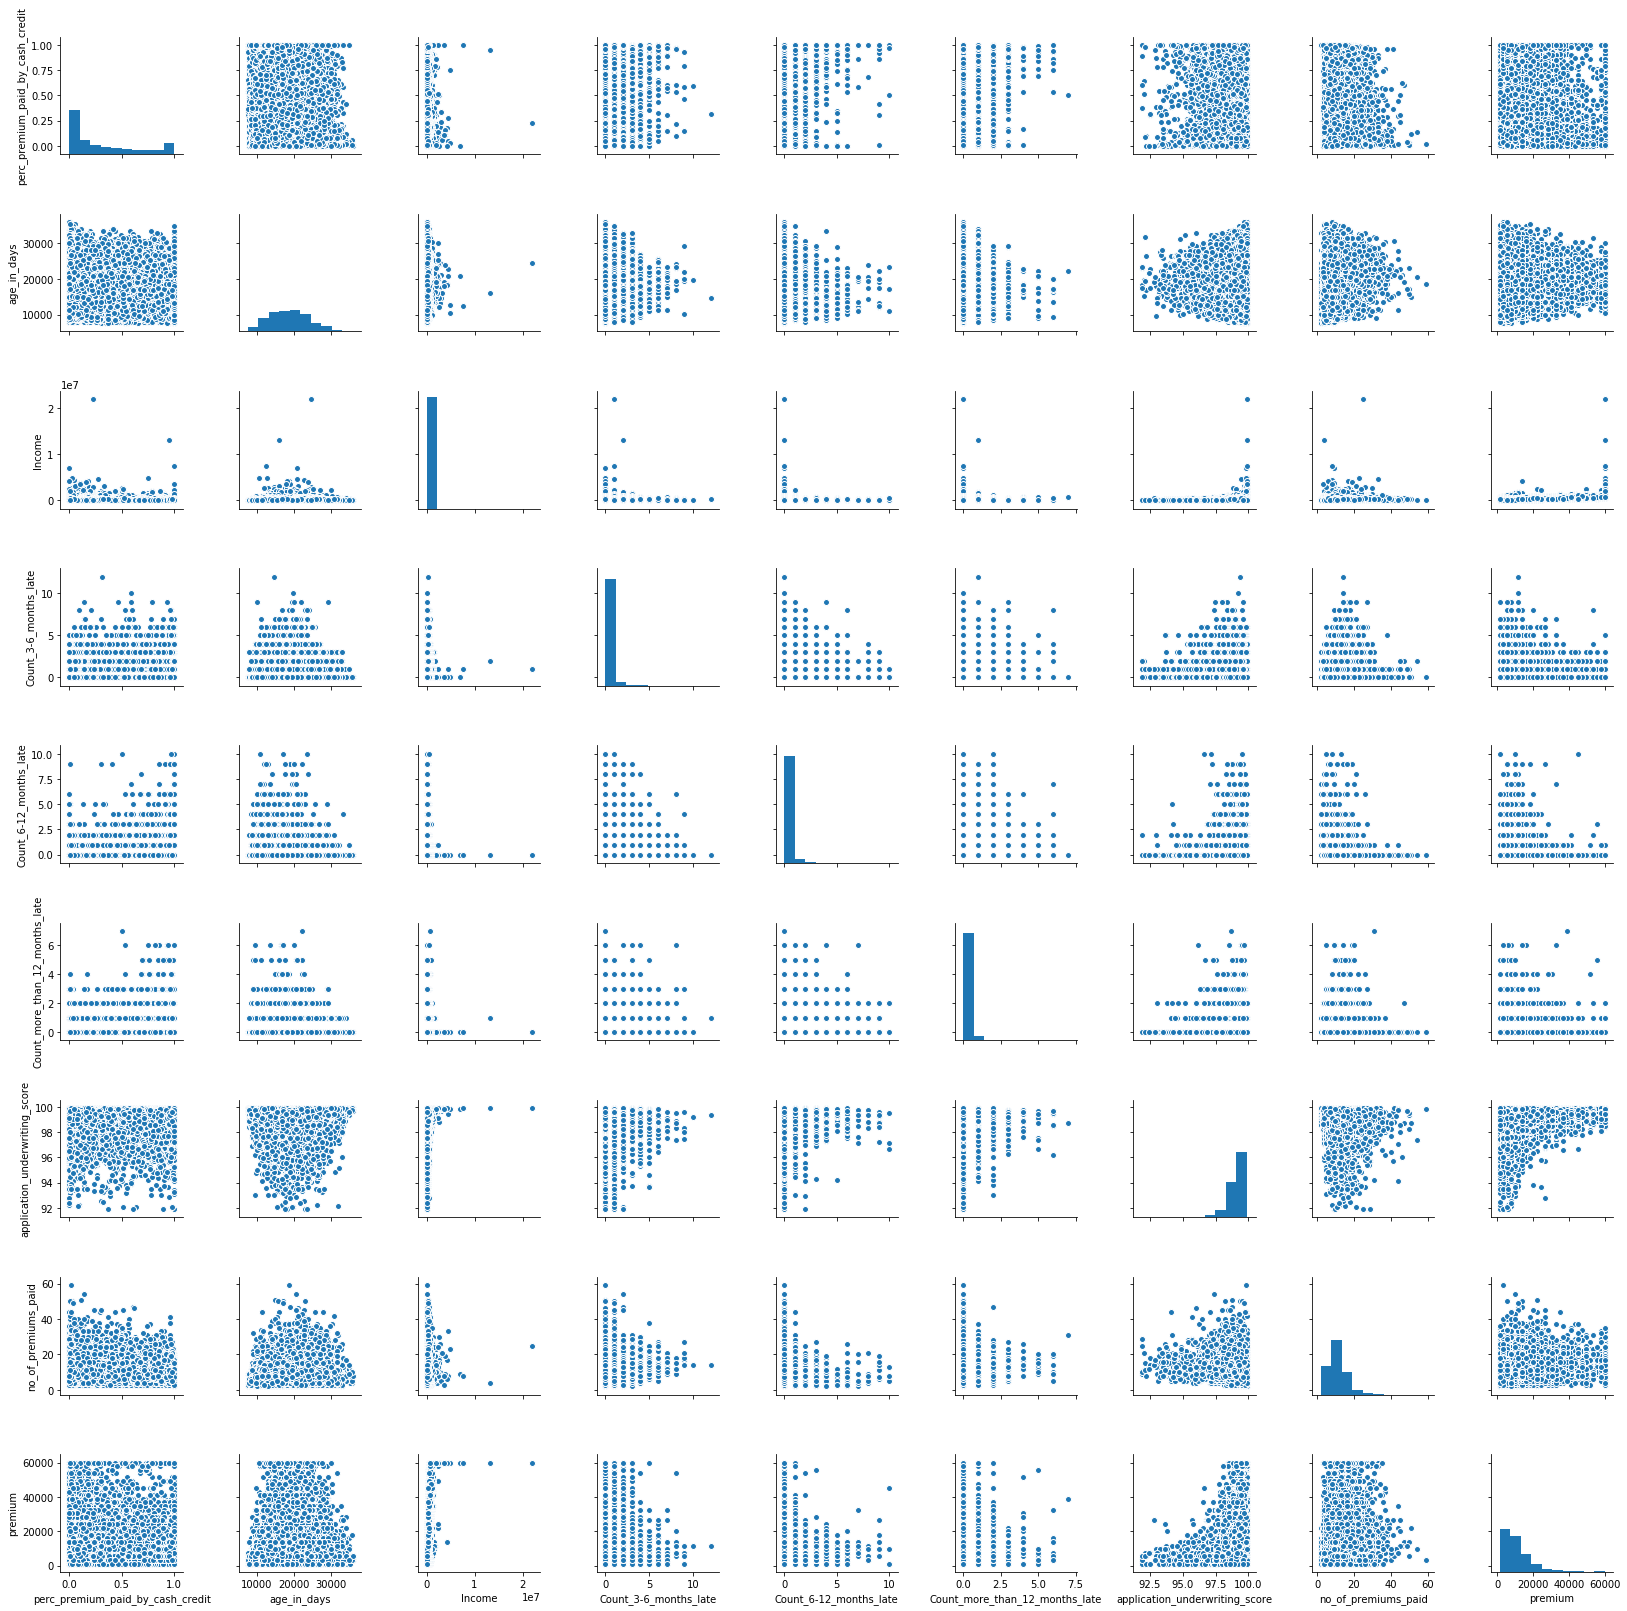

In [99]:
data_test.dropna(inplace=True)
h = sns.pairplot(data_test, dropna=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000161958AC668>]],
      dtype=object)

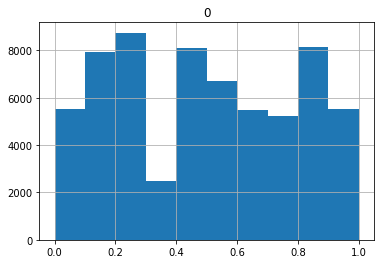

In [109]:
from sklearn.preprocessing import FunctionTransformer, QuantileTransformer

qt = QuantileTransformer(n_quantiles=10, random_state=0)
foo = pd.DataFrame(qt.fit_transform(data[['premium']]))

foo.hist()